Construct a FNN with three hidden layers

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Extended model with three hidden layers

model = models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (5, )),
        # First hidden layer
    layers.Dense(64, activation = 'relu'),
        # Second hidden layer
    layers.Dense(32, activation = 'relu'),
        # Third hidden layer
    layers.Dense(10, activation = 'softmax')
        # Output layer
])

c:\Users\JUANJO\Documents\GitHub\AMS_516\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,434 (44.66 KB)

 Trainable params: 11,434 (44.66 KB)

 Non-trainable params: 0 (0.00 B)

The following code defines a simple FNN using PyTorch and calculates the total and trainable parameters in the model.

In [4]:
import torch
import torch.nn as nn

# Define a simple feed-forward neural network

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 128)    # Input layer
        self.fc2 = nn.Linear(128, 64)   # Hidden layer
        self.fc3 = nn.Linear(64, 10)    # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Instantiate the model
model = SimpleNN()

In [8]:
# Print the model architecture
print(model,'\n')

# Calculate the number of parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')

SimpleNN(
  (fc1): Linear(in_features=5, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
) 

Total parameters: 9674
Trainable parameters: 9674


Here is an example of how to create a neural network in TensorFlow to classify a binary output (0 or 1) with a 3-dimensional input using two hidden layers. We'll also simulate 1000 training samples and 200 testing samples. 

**Step 1.** Import libraries 

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

**Step 2.** Simulate data

In [12]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Simulate 1000 training samples and 200 testing samples
X_train = np.random.rand(1000, 3)   # 1000 samples, 3 features
X_test = np.random.rand(200, 3)     # 200 samples, 3 features

# Generate binary labels (0 or 1) using a simple rule
y_train = (np.sum(X_train, axis = 1) > 1.5).astype(int)
    # Label is 1 if the sum of the features > 1.5, else 0
y_test = (np.sum(X_test, axis = 1) > 1.5).astype(int)

**Step 3.** Define the FNN model 

In [20]:
# Define the model
model = models.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (3, )),
        # First hidden layer
    layers.Dense(32, activation = 'relu'),
        # Second hidden layer
    layers.Dense(1, activation = 'sigmoid')
        # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer =  'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Print the model summary
model.summary()

c:\Users\JUANJO\Documents\GitHub\AMS_516\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

**Step 4.** Train the model 

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5290 - loss: 0.6571 - val_accuracy: 0.5000 - val_loss: 0.6431
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6140 - loss: 0.6174 - val_accuracy: 0.6500 - val_loss: 0.5909
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7890 - loss: 0.5518 - val_accuracy: 0.8400 - val_loss: 0.4985
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8970 - loss: 0.4556 - val_accuracy: 0.9000 - val_loss: 0.3931
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9350 - loss: 0.3548 - val_accuracy: 0.9150 - val_loss: 0.3022
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.2750 - val_accuracy: 0.9250 - val_loss: 0.2397
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9540 - loss: 0.2218 - val_accuracy: 0.9400 - val_loss: 0.1976
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9600 - loss: 0.1863 - val_accuracy: 0.9500 - val_loss

**Step 5.** Evaluate the model 

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0731 
Test accuracy: 0.9750


In [23]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Calculate accuracy manually
def accuracy_score(a, b):
    accuracy = len([a[i] for i in range(0, len(a)) if a[i] == b[i]]) / len(a)
    return accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Manual accuracy: {accuracy:.4f}')

Manual accuracy: 0.9750


**Step 6.** Plot the training results

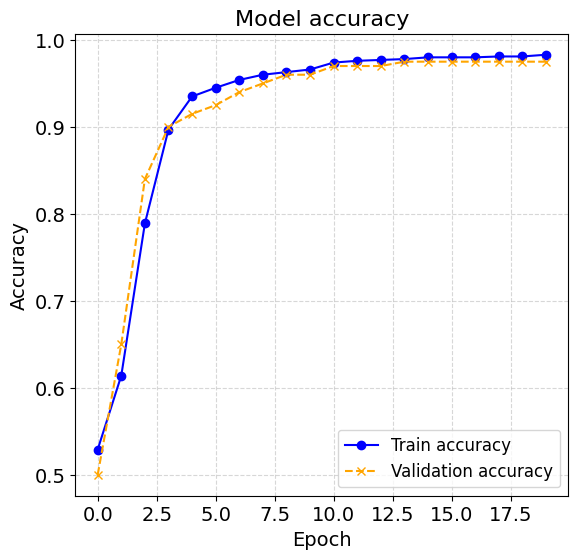

In [31]:
import matplotlib.pyplot as plt

# Plotting with enhanced visualizations
plt.figure(figsize = (14, 6))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train accuracy',
                                    color = 'blue', linestyle = '-', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy',
                                    color = 'orange', linestyle = '--', marker = 'x')
plt.title('Model accuracy', fontsize = 16)
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend(loc = 'best', fontsize = 12)

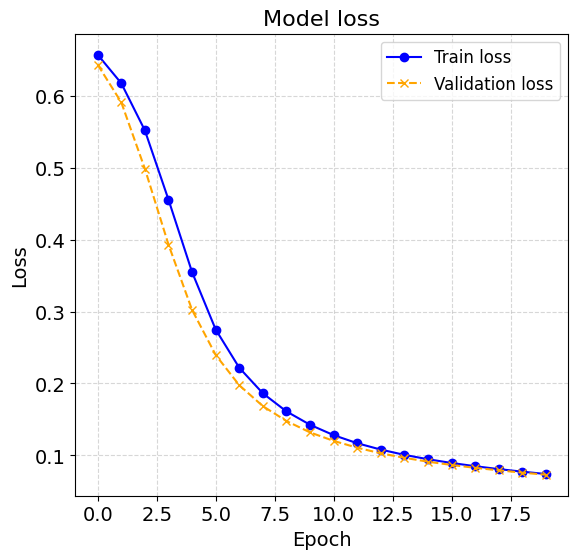

In [32]:
# Plotting training and validation loss
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train loss',
                                    color = 'blue', linestyle = '-', marker = 'o')
plt.plot(history.history['val_loss'], label = 'Validation loss',
                                    color = 'orange', linestyle = '--', marker = 'x')
plt.title('Model loss', fontsize = 16)
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend(loc = 'best', fontsize = 12)

Now, doing the same but with PyTorch, we have

**Step 1.** Import libraries 

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

**Step 2.** Simulate the data 

In [57]:
# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Simulate 1000 training samples and 200 testing samples
X_train = np.random.rand(1000, 3).astype(np.float32)   # 1000 samples, 3 features
X_test = np.random.rand(200, 3).astype(np.float32)     # 200 samples, 3 features

# Generate binary labels (0 or 1) using a simple rule
y_train = (np.sum(X_train, axis = 1) > 1.5).astype(np.float32)
    # Label is 1 if the sum of the features > 1.5, else 0
y_test = (np.sum(X_test, axis = 1) > 1.5).astype(np.float32)

# Convert to PyTorch tensors

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).view(-1, 1)
    # Reshape for single output neuron
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test).view(-1, 1)

**Step 3.** Define the FNN model

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 64)    # First hidden layer with 64 neurons
        self.fc2 = nn.Linear(64, 32)   # Second hidden layer with 32 neurons
        self.fc3 = nn.Linear(32, 1)    # Output layer with one neuron

    def forward(self, x):   # Can be written better using nn.Sequential 
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
    
# Instantiate the model
model = SimpleNN()

**Step 4.** Set up the training components

In [62]:
# Define the loss function and optimizer
criterion = nn.BCELoss()    # Binary cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Create DataLoader instances
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

**Step 5.** Train the model

In [63]:
# Training loop
num_epochs = 20
train_losses = []
for epoch in range (num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}')

Epoch 1/20, Loss: 0.6623
Epoch 2/20, Loss: 0.5954
Epoch 3/20, Loss: 0.4864
Epoch 4/20, Loss: 0.3624
Epoch 5/20, Loss: 0.2645
Epoch 6/20, Loss: 0.2050
Epoch 7/20, Loss: 0.1670
Epoch 8/20, Loss: 0.1410
Epoch 9/20, Loss: 0.1250
Epoch 10/20, Loss: 0.1137
Epoch 11/20, Loss: 0.1027
Epoch 12/20, Loss: 0.1028
Epoch 13/20, Loss: 0.0906
Epoch 14/20, Loss: 0.0839
Epoch 15/20, Loss: 0.0822
Epoch 16/20, Loss: 0.0781
Epoch 17/20, Loss: 0.0756
Epoch 18/20, Loss: 0.0686
Epoch 19/20, Loss: 0.0672
Epoch 20/20, Loss: 0.0635


**Step 6.** Evaluate the model

In [64]:
# Evaluation loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = (outputs > 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9850


**Step 7.** Plot the training loss

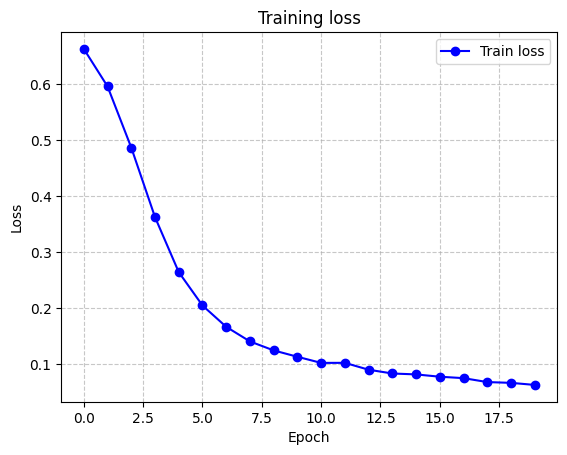

In [65]:
# Plotting training loss

plt.plot(range(num_epochs), train_losses, label = 'Train loss', color = 'blue', linestyle = '-', marker = 'o')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.show()